# Taylor series comparison
a) Finden Sie heraus ab welcher Ordnung der Approximationsfehler der Taylorreihe von `exp(x)` um `x0 = 0` an der Stelle `x = 3` kleiner als 10^−4 ist. Taylorreihenentwicklungen bekommen Sie in sympy via `f.series(x,x0,Ordnung)`; verwenden Sie `.removeO()` um das Landau Symbol aus den Entwicklungen zu entfernen und diese als Funktion auswerten zu können. Speichern Sie die Approximationsfehler verschiedener Ordnungen in eine Liste `ep` und wählen Sie eine geeignete Kontrollstruktur um die gesuchte Ordnung zu bestimmen. Geben Sie außerdem die Liste `ep` aus.
b) Plotten Sie in einer Figur mit Wertebereich [−1,10]) die Ausgangsfunktion 𝑓 sowie die Taylorreihenentwicklungen der Ordnungen 5,10 und 15 mit verschiedenen Farben (zB line_color = 'r'). Die Ausgabe einzelner Plots kann mit `show = False` unterdrückt werden und mit `p1.extend(p2)` etc können Plots zusammengefügt werden. p1.show() gibt dann den Gesamtplot aus.

In [3]:
from sympy import Symbol
from sympy.functions import exp

def taylor_expansion(function, x, x0, order):
    return function.series(x, x0, order).removeO()

def taylor_approximation(point, x0, max_order = 25, epsilon = 1e-4):
    ep = []
    x = Symbol('x')
    e_x = exp(x).evalf(subs = {'x': point})
    limit_order = 0
    for order in range(max_order):
        expansion = taylor_expansion(exp(x), x, x0, order)
        ep.append(
            abs(expansion.evalf(subs = {'x': point}) - e_x)
        )

        if not limit_order and ep[-1] <= epsilon:
            limit_order = order
    
    return ep, limit_order

ep, order = taylor_approximation(3, 0)
print(f'The order of a taylor expansion of exp(x) with a deviation from the true value smaller or equal to 10^-4 is: {order}')
for i, deviation in enumerate(ep):
    print(f'{i}: {deviation}')

The order of a taylor expansion of exp(x) with a deviation from the true value smaller or equal to 10^-4 is: 14
0: 20.0855369231877
1: 19.0855369231877
2: 16.0855369231877
3: 11.5855369231877
4: 7.08553692318767
5: 3.71053692318767
6: 1.68553692318767
7: 0.673036923187667
8: 0.239108351759096
9: 0.0763851374733804
10: 0.0221440660448096
11: 0.00587174461623974
12: 0.00143383877208336
13: 0.000324362311044268
14: 0.0000683292815750747
15: 0.0000134650609737719
16: 0.00000249221685422185
17: 4.34808580251911E-7
18: 7.17365331581732E-8
19: 1.12245253092169E-8
20: 1.66999569728432E-9
21: 2.36816788401484E-10
22: 3.20774518058897E-11
23: 4.16022771787539E-12
24: 5.18696197104873E-13


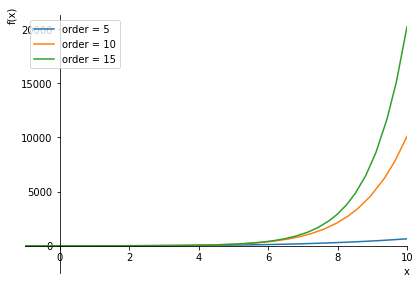

In [18]:
from sympy.plotting import plot
p = plot(
    xlim = (-1, 10), 
#    ylim = (-100, 5000),
    legend = True,
    loc = 'best',
    show = False
)
for order in [5, 10, 15]:
    x = Symbol('x')
    expansion = taylor_expansion(exp(x), x, 0, order)
    p.extend(
        plot(
            expansion, 
            label = f'order = {order}', 
            show = False)
    )
p.show()

# System of equations
Seien 
$$f(x, y) = x^3 + 3x^2y - x^2 + 3xy^2 - 2xy + y^3 - y^2$$

$$g(x, y) = x^2 + y^2$$

Geben Sie zuerst $f$ vereinfacht (faktorisiert) aus. Lösen Sie dann das Gleichungssystem $f(x, y) = 0, g(x, y) = 0$ und geben Sie die Lösungsmenge aus. Stellen Sie weiters die zweiten partiellen Ableitungen in der Hesse-Matrix von $f$ dar und geben Sie diese aus. Die Hesse-Matrix H ist gegeben durch

$$
  H = 
  \begin{pmatrix}
    f_{xx} & f_{xy}\\
    f_{yx} & f_{yy}\\
  \end{pmatrix}
$$

wobei $f_{xx}$ einfach bedeutet, dass die Ableitung von $f$ nach $x$ nochmals nach $x$ abgeleitet wird (also die 2. Ableitung nach 𝑥 gebildet wird), $f_{xy}$ dass die 1.Ableitung von $f$ nach $x$ danach nach $y$ abgeleitet wird, etc. 

In [28]:
from sympy.abc import x, y
f = x*x*x + 3*x*x*y - x*x + 3*x*y*y - 2*x*y + y*y*y - y*y
g = x*x + y*y
f.factor()

(x + y)**2*(x + y - 1)

In [34]:
from sympy import solve
solve([f, g], [x, y])

[(0, 0), (1/2 - I/2, 1/2 + I/2), (1/2 + I/2, 1/2 - I/2)]

In [37]:
from sympy import Matrix
H = Matrix(
    [
        [f.diff(x).diff(x), f.diff(x).diff(y)],
        [f.diff(y).diff(x), f.diff(y).diff(y)]
    ]
)
H

Matrix([
[6*x + 6*y - 2, 6*x + 6*y - 2],
[6*x + 6*y - 2, 6*x + 6*y - 2]])

# Toeplitz matrix
a) Eine $n \times n$ tridiagonale Toeplitz-Matrix hat die Form
$$
  m =
  \begin{pmatrix}
    a & c & 0 & \cdots & 0 \\
    b & a & c & \ddots & \vdots \\
    0 & b & \ddots & \ddots & 0 \\
    \vdots & \ddots & \ddots & \ddots & c \\
    0 & \cdots & 0 & b & a \\
  \end{pmatrix}
$$

Schreiben Sie eine Funktion, die eine solche $n \times n$ Matrix für eine beliebige Größe $n$ und Variablen $a, b, c$ zurückgibt. Geben Sie die Matrix für verschiedene $n$ aus und vergleichen Sie die Standardausgabe mit jener Ausgabe, die Sie erhalten, wenn Sie display() aus dem Modul IPython.display verwenden.

In [73]:
from sympy import Matrix
from sympy.abc import a, b, c
from IPython.display import display

def toeplitz_matrix(n):
    m = [
        [a, c] + [0] * (n - 2)
    ]
    for i in range(n - 2):
        m.append(
            [0] * i + [b, a, c] + [0] * (n - i - 3)
        )
    
    m.append(
        [0] * (n - 2) + [b, a]
    )
    return Matrix(m)

for n in range(4, 9, 2):
    print(f'{n} x {n} Toeplitz matrix')
    m = toeplitz_matrix(n)
    print(m)
    display(m)
    print()

4 x 4 Toeplitz matrix
Matrix([[a, c, 0, 0], [b, a, c, 0], [0, b, a, c], [0, 0, b, a]])


Matrix([
[a, c, 0, 0],
[b, a, c, 0],
[0, b, a, c],
[0, 0, b, a]])


6 x 6 Toeplitz matrix
Matrix([[a, c, 0, 0, 0, 0], [b, a, c, 0, 0, 0], [0, b, a, c, 0, 0], [0, 0, b, a, c, 0], [0, 0, 0, b, a, c], [0, 0, 0, 0, b, a]])


Matrix([
[a, c, 0, 0, 0, 0],
[b, a, c, 0, 0, 0],
[0, b, a, c, 0, 0],
[0, 0, b, a, c, 0],
[0, 0, 0, b, a, c],
[0, 0, 0, 0, b, a]])


8 x 8 Toeplitz matrix
Matrix([[a, c, 0, 0, 0, 0, 0, 0], [b, a, c, 0, 0, 0, 0, 0], [0, b, a, c, 0, 0, 0, 0], [0, 0, b, a, c, 0, 0, 0], [0, 0, 0, b, a, c, 0, 0], [0, 0, 0, 0, b, a, c, 0], [0, 0, 0, 0, 0, b, a, c], [0, 0, 0, 0, 0, 0, b, a]])


Matrix([
[a, c, 0, 0, 0, 0, 0, 0],
[b, a, c, 0, 0, 0, 0, 0],
[0, b, a, c, 0, 0, 0, 0],
[0, 0, b, a, c, 0, 0, 0],
[0, 0, 0, b, a, c, 0, 0],
[0, 0, 0, 0, b, a, c, 0],
[0, 0, 0, 0, 0, b, a, c],
[0, 0, 0, 0, 0, 0, b, a]])

b) Geben Sie nun eine tridiagonale Toeplitz-Matrix der Größe $n = 5$ mit Zahlenwerten aus, indem Sie eine allgemeine Toeplitz-Matrix erstellen und konkrete Werte für die Symbole übergeben: $a, b, c$ sollen hier auf zwei Nachkommastellen gerundete Zufallszahlen aus [−1,1] sein. Erstellen Sie dann eine Funktion, die eine Liste mit den Eigenwerten ohne algebraische Vielfachheit zurückgibt. Geben Sie dann die Eigenwerte für unterschiedlichen Fälle von $b$ und $c$ aus, wobei letztendlich unterschieden werden soll, ob $b*c \geq 0$ ist. Was fällt Ihnen auf?

In [83]:
import random
m = toeplitz_matrix(5)
m.evalf(
    subs = {
        var: round(random.uniform(-1, 1), 2) for var in 'abc'
    }
)

Matrix([
[-0.97, -0.61,     0,     0,     0],
[-0.45, -0.97, -0.61,     0,     0],
[    0, -0.45, -0.97, -0.61,     0],
[    0,     0, -0.45, -0.97, -0.61],
[    0,     0,     0, -0.45, -0.97]])

In [84]:
def eigenvalues(m):
    return [eigval for eigval, mult in m.eigenvals().items()]

subs = {
    key1: {key2: val for key2, val in zip('abc', vals)}
    for key1, vals in zip(['geq0', 'leq0'], [[0.54, 0.26, 0.80], [0.54, -0.26, 0.80]])
}

for k, sub in subs.items():
    print(
        k,
        eigenvalues(
            m.evalf(subs = sub)
        )
    )

geq0 [-0.249936706325260, 0.540000000000000, 1.32993670632526, 0.996070170039655, 0.0839298299603448]
leq0 [0.54 + 0.78993670632526*I, 0.54 - 6.81490126339204e-65*I, 0.54 - 0.78993670632526*I, 0.54 - 0.456070170039655*I, 0.54 + 0.456070170039655*I]


c) Berechnen Sie die Determinante einer zufälligen $5 \times 5$ Toeplitz-Matrix mit $a, b, c \neq 0$. Was sagt dies über den Rang der Matrix aus? Überlegen und erklären Sie wann die Matrix nicht vollen Rang hat. Belegen Sie Ihre Überlegung durch die Berechnung der Determinante von einer allgemeinen tridiagonalen $5 \times 5$ Toeplitz-Matrix aus (a). Wann ist die Determinante 0? Illustrieren Sie die verschiedenen Fälle mit geeignet gewählten Beispielen.

In [100]:
subs = {k: random.randint(1, 10) for k in 'abc'}
m_sub = m.evalf(subs = subs)
m_sub

Matrix([
[2.0, 6.0,   0,   0,   0],
[5.0, 2.0, 6.0,   0,   0],
[  0, 5.0, 2.0, 6.0,   0],
[  0,   0, 5.0, 2.0, 6.0],
[  0,   0,   0, 5.0, 2.0]])

In [101]:
m_sub.det()

4472.00000000000

Die Determinante einer quadratischen Matrix gibt Aufschluss darüber ob es sich bei der betrachteten Matrix um eine reguläre, also invertierbare oder eine singuläre, nicht invertierbare, Matrix handelt. Sei $A$ eine quadratische Matrix der Dimension $n \times n$. Ist die Determinante $\det(A) \neq 0$, so ist $A$ invertierbar und $\text{rang}(A) = n$. Ist $\det(A) = 0$ ist $A$ nicht invertierbar und $\text{rang}(A) < n$. Weiters lässt sich über den Rang einer quadratischen Matrix feststellen ob ihre Zeilen- bzw. Spaltenvektoren linear unabhängig voneinander sind. Ist dies der Fall so haben wir eine reguläre Matrix anderfalls ist die Matrix singulär. Daher ist die Determinante einer quadratischen Matrix genau dann 0 wenn nicht alle Zeilen- oder Spaltenvektoren linear unabhängig sind (z.B. wenn einer der Vektoren ein Vielfaches eines anderen Vektors ist). Die Determinante einer $5 \times 5$ Toeplitzmatrix 

$$
  m =
  \begin{pmatrix}
    a & c & 0 & 0 & 0 \\
    b & a & c & 0 & 0 \\
    0 & b & a & c & 0 \\
    0 & 0 & b & a & c \\
    0 & 0 & 0 & b & a \\
  \end{pmatrix}
$$

ist definiert als

$$
  \det(m) = a^5 - 4a^3bc + 3ab^2c^2
$$

und daher 

$$
\det(A) = 0 \Longleftrightarrow a = 0 \vee 4a^3bc = a^5 + 3ab^2c^2
$$

In [129]:
m1 = m.evalf(subs = {'a': 2, 'b': 2, 'c': 2})

In [130]:
m2 = m.evalf(subs = {'a': 0, 'b': 2, 'c': 2})

In [131]:
print(m1.det())
print(m2.det())

0
0
